In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#load the data 
data = pd.read_csv('data_main.csv')

In [3]:
data.shape

(8784, 9)

In [4]:
data.sample(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,rain
7463,11/6/2012 23:00,-1.5,-6.4,69,6,25.0,101.96,1,30.1635
4532,7/7/2012 20:00,25.5,14.5,51,9,48.3,100.43,2,221.4050
4580,7/9/2012 20:00,19.5,7.9,47,7,48.3,101.02,1,296.2560
2784,4/26/2012 0:00,5.8,0.9,71,7,25.0,100.68,2,2.4001
3978,6/14/2012 18:00,22.7,7.5,38,17,48.3,102.16,1,615.7530
476,1/20/2012 20:00,-16.9,-24.8,50,9,25.0,102.34,1,291.1080
1789,3/15/2012 13:00,3.4,0.0,78,22,24.1,102.12,2,25.3281
6667,10/4/2012 19:00,14.8,14.6,99,6,9.7,101.10,2,386.2340
4144,6/21/2012 16:00,32.5,17.9,42,24,24.1,100.14,1,267.2150
1445,3/1/2012 5:00,-5.3,-7.9,82,33,2.4,100.58,3,357.9680


In [5]:
data['target'] = data['rain'].apply(lambda x: 1 if x > 100 else 0)

In [6]:
data.sample(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,rain,target
1538,3/5/2012 2:00,-14.5,-22.3,52,24,25.0,100.39,1,13.12230,0
8394,12/15/2012 18:00,-9.1,-15.1,62,17,25.0,102.54,1,767.51300,1
2738,4/24/2012 2:00,6.1,4.5,89,6,9.7,98.50,2,11.88940,0
3329,5/18/2012 17:00,20.9,2.5,30,17,48.3,101.59,2,383.85900,1
6400,9/23/2012 16:00,15.1,5.7,53,15,48.3,101.07,1,333.84500,1
420,1/18/2012 12:00,-11.0,-17.8,57,37,24.1,101.00,1,5.30771,0
3343,5/19/2012 7:00,14.7,6.8,59,9,48.3,101.72,1,448.97800,1
8427,12/17/2012 3:00,-2.6,-3.7,92,28,8.0,100.95,3,109.43800,1
2064,3/27/2012 0:00,-4.3,-17.6,35,22,25.0,101.94,1,4.36869,0
1270,2/22/2012 22:00,2.7,-0.8,78,15,25.0,99.26,2,24.29990,0


In [7]:
data.drop(columns='Date/Time', inplace=True)

In [8]:
data.head(5)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,rain,target
0,-1.8,-3.9,86,4,8.0,101.24,2,18.5356,0
1,-1.8,-3.7,87,4,8.0,101.24,2,16.2548,0
2,-1.8,-3.4,89,7,4.0,101.26,3,70.7981,0
3,-1.5,-3.2,88,6,4.0,101.27,3,66.1616,0
4,-1.5,-3.3,88,7,4.8,101.23,2,267.2150,1


In [9]:
data['target'].value_counts()

target
1    4870
0    3914
Name: count, dtype: int64

In [10]:
x = data.drop(columns='target',axis=1)
y=data['target']


In [11]:
#train test split 
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7027, 8), (1757, 8), (7027,), (1757,))

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train,y_train)

C:\Users\Pritam Dutta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#accuracy score 
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(x_train)
accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Accuracy : ",accuracy_score_train)

Accuracy :  0.9998576917603529


In [18]:
y_test_pred = model.predict(x_test)
accuracy_score_test = accuracy_score(y_test,y_test_pred)
print("Accuracy : ",accuracy_score_test)

Accuracy :  0.9994308480364257


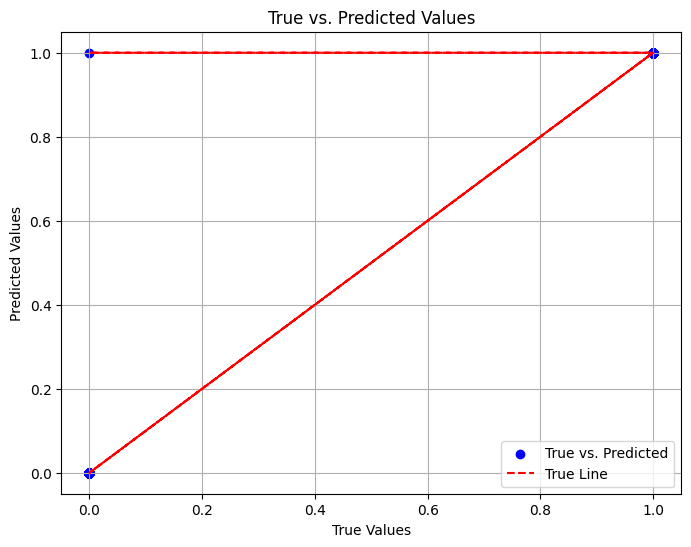

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='True vs. Predicted')

# Plot the true line
plt.plot(y_test, y_test_pred, linestyle='--', color='red', label='True Line')

plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.ensemble import RandomForestClassifier

In [21]:
md = SVC(kernel='linear')

In [22]:
md.fit(x_train,y_train)
y_train_pred = md.predict(x_train)
accuracy_score_train = accuracy_score(y_train,y_train_pred)
print("Accuracy : ",accuracy_score_train)

Accuracy :  1.0


# chances of CloudBurst (dependencies are below this model)

In [23]:
#make a predictive model 
input_data = [29,67,54,14,8.046,101.3,1,16.79]
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
#prediction 
predict = model.predict(input_data_reshape)
print(predict)
if predict ==0:
    print("There is no chance to CloudBurst")
else:
    print("There is a chance of cloudBurst")

[0]
There is no chance to CloudBurst


C:\Users\Pritam Dutta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
y[12]

0

# take a input of 
# Temp_C,
# Dew Point Temp_C,
# Rel Hum_%,
# Wind Speed_km/h
# Visibility_km -visibility
# Press_kPa, -pressure
# Weather ->clear,cloudy etc
# rain -> per inch

In [25]:
# 1-> clear 
# 2-> cloudy,most cloudy all cloudy situation 
# 3-> rain with all rainy situation 
# 4->for others like snowfall etc.


In [26]:
x_per = data.drop(columns='rain',axis=1)
y_per = data['rain']


In [27]:
x_per

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,target
0,-1.8,-3.9,86,4,8.0,101.24,2,0
1,-1.8,-3.7,87,4,8.0,101.24,2,0
2,-1.8,-3.4,89,7,4.0,101.26,3,0
3,-1.5,-3.2,88,6,4.0,101.27,3,0
4,-1.5,-3.3,88,7,4.8,101.23,2,1
...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,3,1
8780,0.2,-2.4,83,24,9.7,100.03,3,1
8781,-0.5,-1.5,93,28,4.8,99.95,3,0
8782,-0.2,-1.8,89,28,9.7,99.91,3,0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


In [29]:
las = Lasso()

In [30]:
#train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_per,y_per,test_size=0.2,random_state=2)

In [31]:
x_train.shape,x_test.shape,y_train.shape

((7027, 8), (1757, 8), (7027,))

In [32]:
from sklearn import metrics 

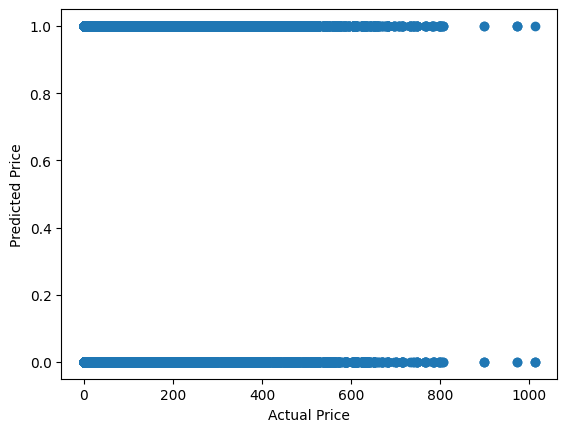

In [33]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [34]:
las.fit(x_train,y_train)

C:\Users\Pritam Dutta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.995e+04, tolerance: 2.918e+04
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [35]:
y_train_pred = las.predict(x_train)
r1 = metrics.r2_score(y_train,y_train_pred)
print(r1)

0.6329750316868752


# chances of Rain For CloudBurst 

In [36]:
#make a predictive model 
input_data = [32,25,51,10,55,101.3,1,0]
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
#prediction
rain_pre = las.predict(input_data_reshape)
print("The Rainfall % is : ",rain_pre[0])


The Rainfall % is :  16.799290830512177


C:\Users\Pritam Dutta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mse = mean_squared_error(y_test,y_test_pred)
print(mse)

81412.85055951975


In [39]:
las.predict(input_data_reshape)

C:\Users\Pritam Dutta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([16.79929083])

In [40]:
import pickle

# Assuming 'model' is your trained machine learning model
with open('your_model.pkl', 'wb') as file:
    pickle.dump(model,file)